In [1]:
import os
import cv2 as cv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [2]:
# Directory structure
DIR = r'data\train'
people = ['moynul', 'riya', 'rohan']  # Updated list of people

# Haar Cascade for face detection
haarCascade = cv.CascadeClassifier('harr_face.xml')


In [3]:
# Features and labels
features = []
labels = []

def create_training_data():
    for person in people:
        path = os.path.join(DIR, person)
        label = people.index(person)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_array = cv.imread(img_path)
            gray = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)

            faces_rect = haarCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

            for (x, y, w, h) in faces_rect:
                faces_roi = gray[y:y + h, x:x + w]
                # Resize face ROI to a fixed size for CNN input
                resized_face = cv.resize(faces_roi, (600, 400))
                features.append(resized_face)
                labels.append(label)

create_training_data()
print('Training data preparation done.')


Training data preparation done.


In [4]:
# Convert to numpy arrays
features = np.array(features, dtype='float32') / 255.0  # Normalize pixel values
labels = np.array(labels)

# Reshape features to include channel dimension (CNN input format)
features = features.reshape(-1, 600, 400, 1)  # 1 channel for grayscale images

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=len(people))
y_val = to_categorical(y_val, num_classes=len(people))


In [5]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(600, 400, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(people), activation='softmax')  # Number of classes (3 for the updated dataset)
])


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.3258 - loss: 7.4334 - val_accuracy: 0.3448 - val_loss: 4.5514
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.2746 - loss: 4.0610 - val_accuracy: 0.6207 - val_loss: 1.0415
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5251 - loss: 1.0328 - val_accuracy: 0.5172 - val_loss: 0.9183
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5880 - loss: 0.9074 - val_accuracy: 0.3793 - val_loss: 0.9705
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6042 - loss: 0.8385 - val_accuracy: 0.7241 - val_loss: 0.7307
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7779 - loss: 0.5426 - val_accuracy: 0.8276 - val_loss: 0.5368
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.8557 - loss: 0.4581 - val_accuracy: 0.8276 - val_loss: 0.4346
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8807 - loss: 0.3017 - val_accuracy: 0.7586 - val_loss: 0.9320
Epoch 9/

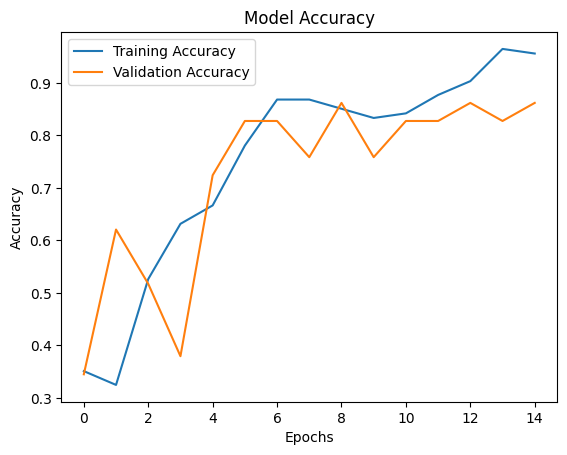

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()


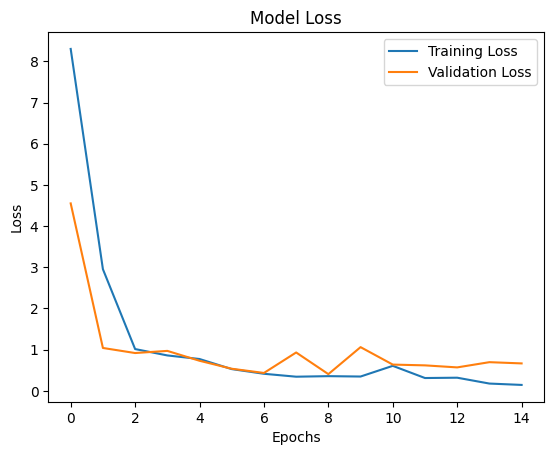

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()


In [10]:
# Save the trained model
model.save('face_recognition_cnn_model02.h5')
print("Model training complete and saved.")


Model training complete and saved.
